# Linear Regression

In this notebook, we will take a dive onto the subcategory of supervised learning that deals with regression analysis.

Regression models are used to predict target variables on a *continuous* scale, which makes the attractive for addressing many questions in industry, such as understand relationships between variables, evaluating trends, or making forecasts. One example would be predicting the sales of a company in the future months.

## Introducing a linear regression model

The goal of the linear regression is to model the relationship between a set of features (also known as explanatory variables x) and a continuous valued response (also known as target variable y). The equation of a multile linear regression model is:


$$y=w_0 + w_1x_1 + ... + w_mx_m$$

where w_0 is the $y$ axis intercept with $x_0=1$.

In [19]:
############################################ Import Data (NTK)############################################

# library providing high-performance, easy-to-use data structures and data 
# analysis tools for the Python programming language
import pandas as pd


df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/housing/housing.data', header=None,
                  sep='\s+')                          # Read the data from URL, No Header, Special separator

print(df.shape)                                       # Print num of rows and columns

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] # Column Names
df.head()                                             # Perview first rows of data

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Dataset description:

|       | Attributes                                                         |
|-------|--------------------------------------------------------------------|

| CRIM  | per capita crime rate by town                                      |

| ZN    | proportion of residential land zoned for lots over $25,000$ sq.ft. |

| INDUS | proportion of non-retail business acres per town                   |

| CHAS  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)                 |

| NOX   |  nitric oxides concentration (parts per 10 million)               |

| RM    |  average number of rooms per dwelling            |

| AGE   |  proportion of owner-occupied units built prior to 1940|

| DIS   | weighted distances to five Boston employment centres           |

| RAD   | index of accessibility to radial highways               |

| TAX   | full-value property-tax rate per \$10,000                |

| PTRATIO  | pupil-teacher ratio by town         |

| B  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town               |

| LSTAT  | lower status of the population                |

|MEDV    | Median value of owner-occupied homes in $1000s|

Dataset available at https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

# Exploring the dataset

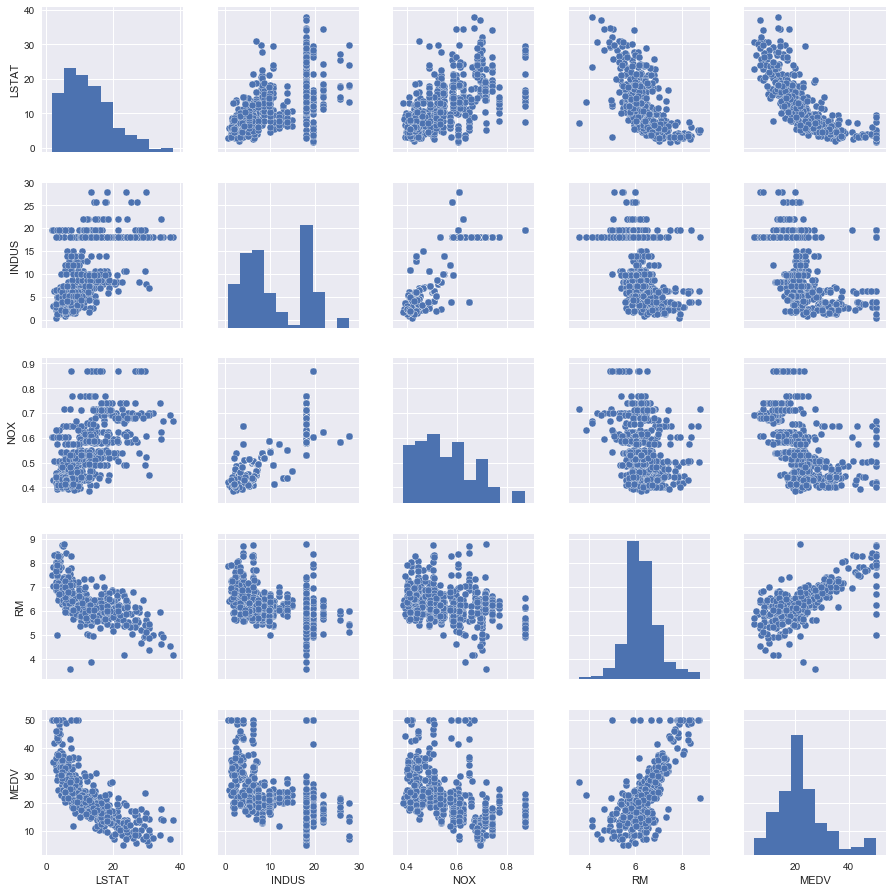

In [17]:
############################################ Data Visualization (NTK) ############################################

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV'] # Select Attributes

sns.pairplot(df[cols], size=2.5)              # Plot pairwise relationships in a dataset
plt.tight_layout()                            # Tight_layout automatically adjusts subplot params 
                                              # so that the subplot(s) fits in to the figure area.
# plt.savefig('housing_dataset.png', dpi=300) # Saves the figure in our local disk
plt.show()                                    # Display figure

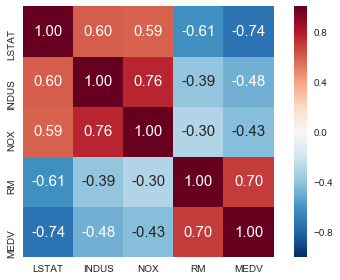

In [3]:
############################################ Correlations (NTK) ############################################

import numpy as np


cm = np.corrcoef(df[cols].values.T) # Return Pearson product-moment correlation coefficients

# sns.set(font_scale=1.5)
# Heatmap visualisation of pearson correlation coefficients
# Documentation https://seaborn.pydata.org/generated/seaborn.heatmap.html
hm = sns.heatmap(cm,                # Plot rectangular data as a color-encoded matrix
                 cbar=True,         # Whether to draw a colorbar.
                 annot=True,        # If True, write the data value in each cell.
                 square=True,       # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 fmt='.2f',         # String formatting code to use when adding annotations.
                 annot_kws={'size': 15}, # Keyword arguments for ax.text when annot is True
                 yticklabels=cols,  # If True, plot the column names of the dataframe.
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('correlation_coefficient.png', dpi=300) # Saves the figure in our local disk
plt.show()

# Estimating Regression Model Coefficients

In [4]:
################################### Fit Simple Linear Regression Model ###################################

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# A simple linear regression with only one feature
X = df[['RM']].values # Attribute
y = df['MEDV'].values # Target Variable

slr = LinearRegression() # Linear Regression class
slr.fit(X, y)            # Fit model to the data

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


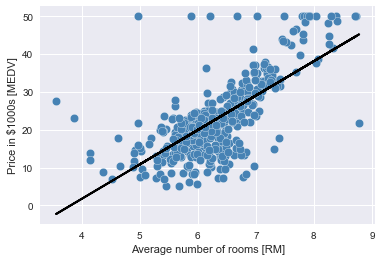

In [5]:
################################### Visualize Linear Regression Model ###################################

def lin_regplot(X, y, model): # Define function that takes as input X, y and model
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70) # A scatter plot of y vs x. s : scalar or array_like, shape (n, ), optional
    plt.plot(X, model.predict(X), color='black', lw=2) #lw = line width   
    return

lin_regplot(X, y, slr)       # Call the above function
plt.xlabel('Average number of rooms [RM]') # Set label for x axis
plt.ylabel('Price in $1000s [MEDV]')       # Set label for y axis

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

In [20]:
################################### Fit a Linear Regression Model (NTK) ###################################

from sklearn.model_selection import train_test_split # Split validation class

X = df.iloc[:, :-1].values # Use all features as attributes except last column
y = df['MEDV'].values      # Set last column as target variable

X_train, X_test, y_train, y_test = train_test_split( # Split validation
    X, y, test_size=0.3, random_state=0)

slr2 = LinearRegression()    # Linear Regression class
slr2.fit(X_train, y_train)   # Fit Model to data
y_train_pred = slr2.predict(X_train) # Apply model to train data
y_test_pred = slr2.predict(X_test)   # Apply model to test data

print('Slope: %.3f', slr2.coef_)

('Slope: %.3f', array([ -1.21310401e-01,   4.44664254e-02,   1.13416945e-02,
         2.51124642e+00,  -1.62312529e+01,   3.85906801e+00,
        -9.98516565e-03,  -1.50026956e+00,   2.42143466e-01,
        -1.10716124e-02,  -1.01775264e+00,   6.81446545e-03,
        -4.86738066e-01]))


In [7]:
######################## Linear Regression Model - Evaluation Metrics (NTK) ########################

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# See all regression metrics here http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
print('MSE train: %.3f, test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MAE train: %.3f, test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
MAE train: 3.104, test: 3.610


# Using regularized methods for regression

## Lasso Regression

In [8]:
######################### Decreasing Linear Regression Model Complexity (NTK) ########################


######################## Regularized Linear Regression Model - Lasso (NTK) ########################

from sklearn.linear_model import Lasso # Lasso Regression class

lasso = Lasso(alpha=0.1)   # Lasso 
                           # alpha : constant that multiplies the L1 term. 
                           # Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, 
                           # solved by the LinearRegression object.
lasso.fit(X_train, y_train) # Fit model to data
y_train_pred = lasso.predict(X_train) # Apply model to train data
y_test_pred = lasso.predict(X_test)   # Apply model to test data
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [9]:
############################### Lasso - Evaluation Metrics (NTK) ###############################

print('MSE train: %.3f, test: %.3f' % ( # MSE
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred))) # MSE Test Set
print('MAE train: %.3f, test: %.3f' % ( # MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # MAE Test Set

MSE train: 20.926, test: 28.876
MAE train: 3.161, test: 3.639


## Ridge Regression

In [10]:
######################### Decreasing Linear Regression Model Complexity (NTK) ########################

######################## Regularized Linear Regression Model - Ridge (NTK) ########################

from sklearn.linear_model import Ridge # Ridge Regression class

ridge = Ridge(alpha=1.0) # Regularization strength; must be a positive float. 
                         # Larger values specify stronger regularization. 
                         # Alpha corresponds to C^-1 in other linear models such as LogisticRegression
ridge.fit(X_train, y_train) # Fit Model
y_train_pred = ridge.predict(X_train) # Apply model to train data
y_test_pred = ridge.predict(X_test)  # Apply model to test data
print(ridge.coef_) # Display coefficients

print('MSE train: %.3f, test: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred))) #MSE Test Set
print('MAE train: %.3f, test: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) #MAE Test Set

[ -1.18308575e-01   4.61259764e-02  -2.08626416e-02   2.45868617e+00
  -8.25958494e+00   3.89748516e+00  -1.79140171e-02  -1.39737175e+00
   2.18432298e-01  -1.16338128e-02  -9.31711410e-01   7.26996266e-03
  -4.94046539e-01]
MSE train: 20.145, test: 27.762
MAE train: 3.105, test: 3.602


# Modeling nonlinear relationships with a linear model

(506, 1)
(506, 3)
(506, 4)
[[ 9.14]
 [ 4.03]
 [ 2.94]
 [ 5.33]]
[[  1.       9.14    83.5396]
 [  1.       4.03    16.2409]
 [  1.       2.94     8.6436]
 [  1.       5.33    28.4089]]
[[   1.          9.14       83.5396    763.551944]
 [   1.          4.03       16.2409     65.450827]
 [   1.          2.94        8.6436     25.412184]
 [   1.          5.33       28.4089    151.419437]]


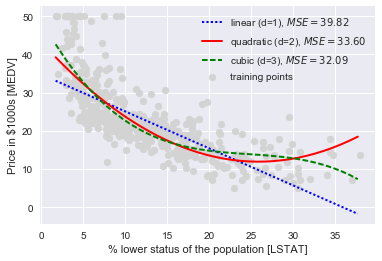

In [11]:
######################### Increasing Linear Regression Model Complexity (NTK) ########################

from sklearn.preprocessing import PolynomialFeatures

X = df[['LSTAT']].values # Attribute
y = df['MEDV'].values    # Target variable

regr = LinearRegression() #Linear Regression instance


# Generate polynomial and interaction features.

# PolynomialFeatures = Generate a new feature matrix consisting of all polynomial 
# combinations of the features with degree less than or equal to the specified degree. 
# For example, if an input sample is two dimensional and of the form [a, b], the degree-2 
# polynomial features are [1, a, b, a^2, ab, b^2].
quadratic = PolynomialFeatures(degree=2) # degree = the degree of the polynomial features (default = 2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

print(X.shape) # Data size after polynomial transformation
print(X_quad.shape)
print(X_cubic.shape)

print(X[1:5,:]) # Preview data after polynomial transformations
print(X_quad[1:5,:])
print(X_cubic[1:5,:])

X_train, X_test, y_train, y_test = train_test_split( # Split Validation
    X, y, test_size=0.3, random_state=0)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X_train, y_train) #Fit Linear Model
y_lin_fit = regr.predict(X_fit)   #Apply Model
linear_mse = mean_squared_error(y_test, regr.predict(X_test)) # mean_squared_error test set

X_quad_train, X_quad_test, y_train, y_test = train_test_split( # Split Validation
    X_quad, y, test_size=0.3, random_state=0)
regr = regr.fit(X_quad_train, y_train)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit)) #Fit Quadratic Model
quadratic_mse = mean_squared_error(y_test, regr.predict(X_quad_test)) # mean_squared_error test set

X_cubic_train, X_cubic_test, y_train, y_test = train_test_split( # Split Validation
    X_cubic, y, test_size=0.3, random_state=0)
regr = regr.fit(X_cubic_train, y_train)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit)) #Fit Cubic Model
cubic_mse = mean_squared_error(y_test, regr.predict(X_cubic_test)) # mean_squared_error test set

################################# Visualization of Results (Do not need to know) #################################

# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, #Linear Line
         label='linear (d=1), $MSE=%.2f$' % linear_mse, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, #Quadratic Line
         label='quadratic (d=2), $MSE=%.2f$' % quadratic_mse,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, #Cubic Line
         label='cubic (d=3), $MSE=%.2f$' % cubic_mse,
         color='green', 
         lw=2, 
         linestyle='--')

#Labels for axes and legend position
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

#plt.savefig('linear_nonlinear.png', dpi=300)
plt.show() # Display figure

As we can see in the resulting plot, the cubic fit captures the relationship between the house prices and LSTAT better than the linear and quadratic fit. However, we should be aware that adding more and more polynominal features increases the complexity of the model and therefore **increases the chance of overfitting**. This is the reason we need to evaluate the performance of the model on a separate test dataset to estimate the generalization performance.

Note that polynomial features are not always the best choice for modeling nonlinear relationships. For example, just by looking at the MEDV_LSTAT scatterplot, we could propose that a log transformation of the LSTAT feature and the square root of MEDV may project the data onto a linear feature space suitable for linear regression. We test this hypothesis with the following code:

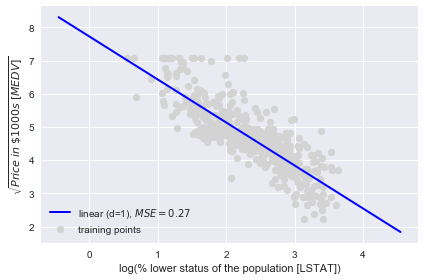

In [12]:
######################################## Feature Transformation (NTK) ########################################

X = df[['LSTAT']].values # Attribute
y = df['MEDV'].values    # Target Variable

# transform features
# The log transformation can be used to make highly skewed distributions less skewed.
X_log = np.log(X)
# Sqrt is a transformation with a moderate effect on distribution shape: it is weaker 
# than the logarithm and the cube root. It is also used for reducing right skewness, 
# and also has the advantage that it can be applied to zero values. 
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt) # Fit model to data with transformed features
y_lin_fit = regr.predict(X_fit) # Apply model
linear_mse = mean_squared_error(y_sqrt, regr.predict(X_log)) #MSE

################################# Visualization of Results (Do not need to know) #################################

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray') # Visualize raw data (x,y)

plt.plot(X_fit, y_lin_fit, # Visualize linear model
         label='linear (d=1), $MSE=%.2f$' % linear_mse, 
         color='blue', 
         lw=2)

# Axes labels and legend position
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
#plt.savefig('linear_nonlinear2.png', dpi=300)
plt.show()

# Decision Tree Regressor

To use the regression tree for regression, we will replace entropy as the impurity measure of a node $t$ by the MSE:

$$I(t)=MSE(t)=\frac{1}{N}\sum_{i \in D_t}{(y^{(i)}-\widehat{y}_t)^2}$$

where $N$ is number of training samples at node $t$, $D_t$ is the training subset at node $t$, $y^{(i)}$ is the true target variable, and $\widehat{y}_t$ is the predicted target value (sample mean):

$$\widehat{y}_t=\frac{1}{N}\sum_{i \in D_t}{y^{(i)}}$$

In the context of the decision tree regressor, the MSE is often referred as  within-node variance, which is why the splitting criterion is also better known as variance reduction. To see what the line fit of a decision tree looks like, let's use the *DecisionTreeRegressor* implemented in scikit-learn  to model the nonlinear relationship between the MEDV and LSTAT variables:

Performance: 0.12 (+/- 1.00)


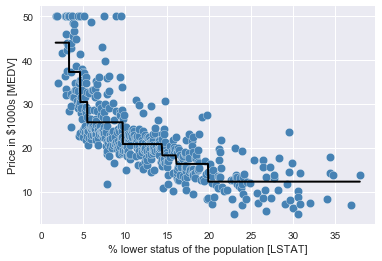

In [13]:
#################################### Regressor Tree - Numeric Prediction (NTK) ####################################

from sklearn.tree import DecisionTreeRegressor #Documentation available here http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.model_selection import cross_val_score

X = df[['LSTAT']].values
y = df['MEDV'].values

# Decision Tree Regressor
# Supported criteria are “mse” for the mean squared error, which is equal to variance 
# reduction as feature selection criterion and minimizes the L2 loss using the mean of 
# each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s 
# improvement score for potential splits, and “mae” for the mean absolute error, 
# which minimizes the L1 loss using the median of each terminal node.
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

scores = cross_val_score(tree, X, y, cv=10) # cross-validation scores

print("Performance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #estimate mean and variance from cross validation

################################# Visualization of Results (Do not need to know) #################################

# Plot regressor tree
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)

# Axes labels
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
#plt.savefig('regression tree.png', dpi=300)
plt.show() # Display figure

We need to be careful about choosing an appropriate value for the depth of the tree to not overfit or underfit the data.

In [14]:
#################################### Regressor Tree - Nested CV (NTK) ####################################

# Find optimal paramater for DecisionTreeRegressor with GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor

inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)
    

# Find the max_depth that minimizes MSE
# Inner CV
parameters = {'max_depth':range(3,50)}      # range of parameters for the depth of the tree
gs_dt = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4) #GridSearchCV
gs_dt.fit(X, y) # Fit model

gs_dt = gs_dt.fit(X,y)
print(" Parameter Tuning")
print("Non-nested Performance: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
# Outer CV
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV Performance: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


 Parameter Tuning
('Non-nested Performance: ', 0.44549283406565543)
('Optimal Parameter: ', {'max_depth': 3})
('Optimal Estimator: ', DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))
('Nested CV Performance: ', 0.64078661829336947, ' +/- ', 0.060211321387185011)


# $k$NN for Regression

In [35]:
##################################### kNN Regressor Example (NTK) #####################################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from math import sqrt

#split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalize data with min max scaling
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

#3NN regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = 3)

#Fit and Evaluate Model
knn_regressor.fit(x_train, y_train)  #fit the model
pred=knn_regressor.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

print('RMSE value is:', error)

('RMSE value is:', 4.692641298132767)


In [50]:
##################################### Optimize kNN Regressor Example (NTK) #####################################

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'p':[1,2]}

knn_regressor2 = neighbors.KNeighborsRegressor()

knn2_optk = GridSearchCV(knn_regressor2, params, cv=10)
knn2_optk.fit(x_train,y_train)
pred2=knn2_optk.predict(x_test) #make prediction on test set
print(knn2_optk.best_params_)
print('RMSE value is:', sqrt(mean_squared_error(y_test,pred2)))

{'n_neighbors': 3, 'p': 1}
('RMSE value is:', 4.600227331694378)


# $k$NN for Regression (Example with Visualization)

In [15]:
####################################### Generate dataset (No Need to Know) #######################################

# Generate sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

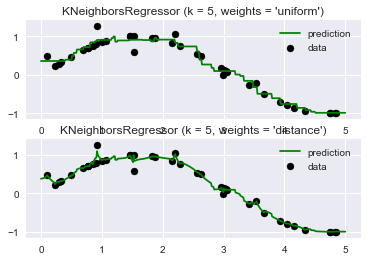

In [16]:
#################################### kNN - Numeric Prediction (No Need to Know) ####################################

from sklearn import neighbors
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights) #Regression based on k-nearest neighbors.
    y_ = knn.fit(X, y).predict(T) # Fit KNeighborsRegressor to data
    
    ################# Visualizations are not needed #################
    # Plot results
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()